In [1]:
import numpy as np

from functools import partial
from numba import njit

from pathlib import Path
import os, sys

SRC_DIR = str(Path('.').resolve().parents[0])
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

import utils

In [8]:
chi2_calculator = utils.Chi2Calculator(N=50, is_highres=True, rsd=True, pantheon=True, bao=True, desy3=True)

In [9]:
chi2_calculator(id_grid=1)
print("done 1")
chi2_calculator(id_grid=2)
print("done 2")
chi2_calculator(id_grid=3)

done 1
done 2


In [31]:
# chi2_calculator.save_grid(id_grid=1)
# chi2_calculator.save_grid(id_grid=2)
# chi2_calculator.save_grid(id_grid=3)

In [11]:
arr = chi2_calculator.get_grid(3)
print(arr)

[[151.43271499 145.28541664 167.49425181 ... 326.51122047 336.97385921
  347.49450637]
 [ 47.70978819 157.73040258 151.99494419 ... 316.83717298 327.23281493
  337.6908813 ]
 [ 97.01973362 145.4859132  164.66722983 ... 307.40627345 317.73143445
  328.12350843]
 ...
 [751.59248158 692.74901645 636.51550976 ...  97.14496452 106.41185054
  117.77825835]
 [781.56359221 720.01359323 662.07217753 ...  95.44765854 105.99209494
  114.10248086]
 [811.57916137 750.15135332 689.11999603 ...  94.07160881 107.06485933
  112.84873635]]


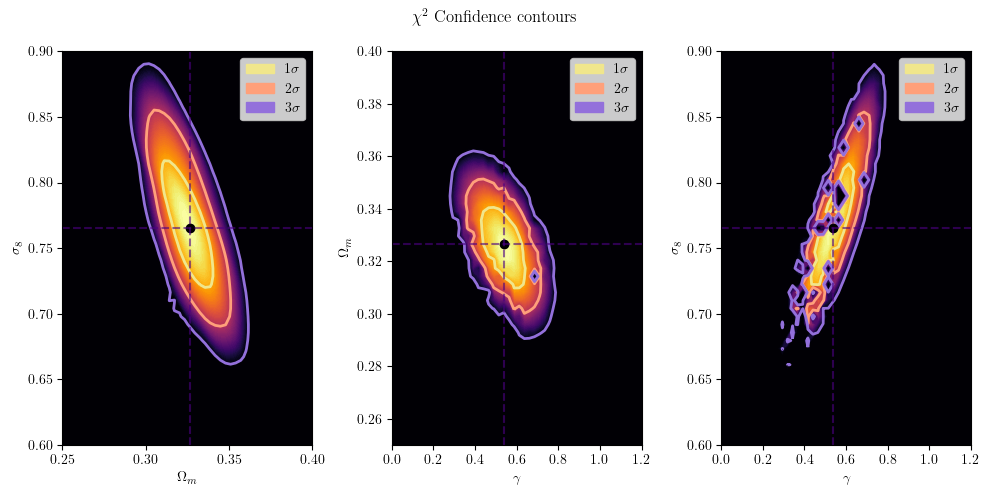

In [10]:
import matplotlib
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})
# chi2_calculator.plot_grid(id_grid=1, display_best_chi2=False, savefig=False)
# chi2_calculator.plot_grid(id_grid=2, display_best_chi2=False, savefig=False)
# # chi2_calculator.plot_grid(id_grid=3, display_best_chi2=False, savefig=False)
chi2_calculator.plot_grids(savefig=False)